In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import random

c:\users\hp\appdata\local\programs\python\python39\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Implement and train a feed-forward neural network (also known as an "MLP" for "multi-layer perceptron") on a dataset called MNIST  and improve model 
generalization by achieving increased accuracy and decrease loss where model gains good confidence with the prediction

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
#diving by 255 to get range between 0 to 1
#pixel value range from 0 to 255
#normalizing the image byy sclaing the pixel between range 0 to 1

x_train = x_train/255
x_test = x_test/255

In [4]:
#Sequential() with a list of all the layers you want to stack together
#relu as the activation function in the first dense layer and a softmax in the output layer.
#The softmax function normalizes all outputs to sum to 1 and ensures that they are in the range [0, 1].



#flatten layer- This layer flattens an input tensor without changing its values.
#This layer flattens the 2D input (28x28) into a 1D vector of size 784. 
#This is typically done to convert the image data into a format that can be fed into a fully connected neural network.


#dense layer - fully connected, It computes the weighted sum of the inputs, adds a bias, 
# and passes the output through an activation function. We are using the ReLU activation function for this example.



model = keras.Sequential([
keras.layers.Flatten(input_shape=(28,28)),         #input layer
keras.layers.Dense(128, activation="relu"),        #hidden layer
keras.layers.Dense(10, activation="softmax")       #output layer
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
#The optimization algorithm determines how the connection weights are updated 
#at each training step with respect to the given loss function. Because we have a multiclass classification problem, 
#the loss function we’ll use is categorical_crossentropy, coupled with the adam optimizer

model.compile(optimizer="sgd",              #stochastic Gradient Descent
loss="sparse_categorical_crossentropy",
metrics=["accuracy"])

In [6]:
#training the model
##The fit() method returns a history object with detailed information regarding model training. 
#The history attribute is a dictionary object. 


history=model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=11)

Epoch 1/11
1875/1875 [==============================] - 7s 3ms/step - loss: 0.6571 - accuracy: 0.8314 - val_loss: 0.3539 - val_accuracy: 0.9050
Epoch 2/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3373 - accuracy: 0.9046 - val_loss: 0.2911 - val_accuracy: 0.9187
Epoch 3/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2877 - accuracy: 0.9186 - val_loss: 0.2585 - val_accuracy: 0.9289
Epoch 4/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2569 - accuracy: 0.9273 - val_loss: 0.2332 - val_accuracy: 0.9356
Epoch 5/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2339 - accuracy: 0.9338 - val_loss: 0.2198 - val_accuracy: 0.9376
Epoch 6/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2148 - accuracy: 0.9396 - val_loss: 0.2001 - val_accuracy: 0.9429
Epoch 7/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1989 - accuracy: 0.9443 - val_loss: 0.1866 - val_accuracy:

In [7]:
test_loss, test_acc=model.evaluate(x_test, y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1490 - accuracy: 0.9566
Loss=0.149
Accuracy=0.957


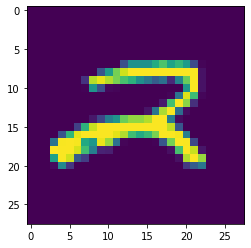

313/313 [==============================] - 1s 2ms/step


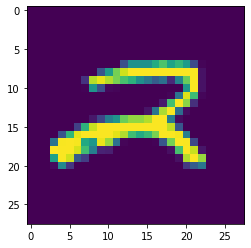

In [8]:
n=random.randint(0,9999)
plt.imshow(x_test[n])
plt.show()
predicted_value=model.predict(x_test)
plt.imshow(x_test[n])
plt.show()

In [9]:
print('Predicted Value: ', predicted_value[n])

Predicted Value:  [4.5916170e-04 6.6444750e-06 9.3200064e-01 3.4536611e-02 3.2519114e-03
 2.5274217e-04 4.0100367e-05 1.8265240e-02 4.9193698e-04 1.0695069e-02]


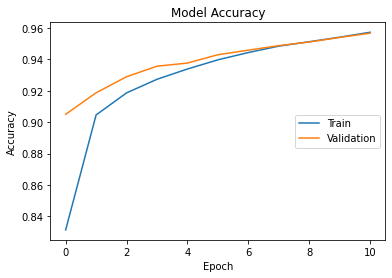

In [10]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='center right')
plt.show()

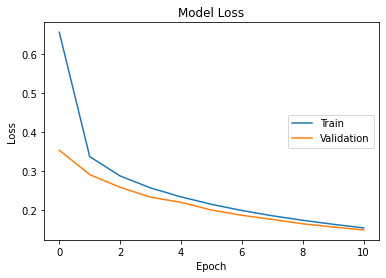

In [11]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='center right')
plt.show()

With above code we can see that, throughout the epochs, our model accuracy increases and loss decreases that is good since our model gains confidence with our prediction
This indicates the model is trained in a good way:
1.	The two loss(loss and val_loss) are decreasing and the accuracy (accuracy and val_accuracy) increasing.
2.	The val_accuracy is the measure of how good the model is predicting so, it is observed that the model is well trained after 10 epochs
